## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings('ignore')





### Exploratory data analysis

In [2]:
# Loading the data 

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Printing the shape of the dataset

df.shape

(284807, 31)

In [4]:
# Checking the different variables type in the dataset.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As the whole data is PCA transformed we will not perform any Outlier treatment on it.

#### Class distribution

In [5]:
# Here we will observe the distribution of our classes

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [6]:
print('Non-fraud percentage :',round(normal_share,2))
print('Fraudulent percentage :', round(fraud_share,2))

Non-fraud percentage : 99.83
Fraudulent percentage : 0.17


We can clearly see that the data is highly imbalanced.

#### Handling Missing values

In [7]:
# Checking the data for missing values.

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that the data has no missing values in it.

#### Barplot for transaction vs Classes

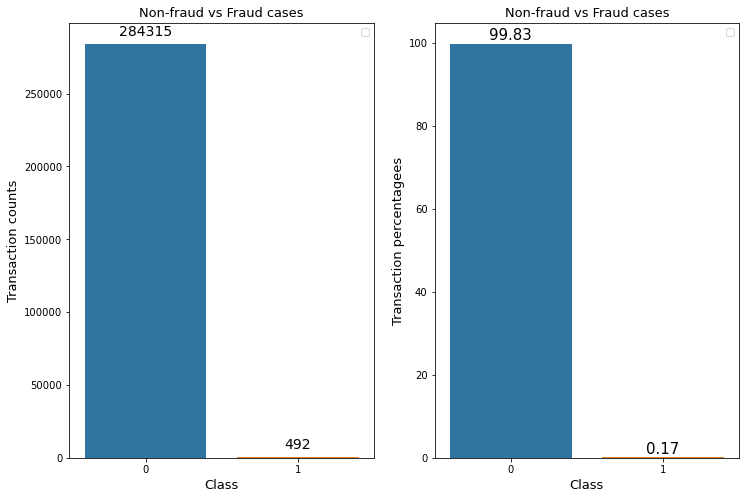

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Creating barplot for transaction count.

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,8))
sns.countplot(df['Class'] ,ax = ax1)
ax1.set_xlabel('Class', fontsize = 13)
ax1.set_ylabel('Transaction counts',fontsize = 13)
ax1.set_title("Non-fraud vs Fraud cases", fontsize = 13)
ax1.legend('Fraud','Non-fraud')

for bar in ax1.patches:
    x = bar.get_bbox().get_points()[:0]
    y = bar.get_bbox().get_points()[1,1]
    ax1.annotate(format(bar.get_height()),
                 (bar.get_x() +bar.get_width() /2,
                 bar.get_height()) , ha='center', 
                 va='bottom',size=14, xytext=(0, 5),
                   textcoords='offset points')



# Creating barplot for transaction percentage.

percentages = {'Class' : ['0','1'] , 'Percentage' : [normal_share,fraud_share]}
df_percentages = pd.DataFrame(percentages)


plots = sns.barplot(x= df_percentages['Class'], y=df_percentages['Percentage'],ax= ax2)
 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

    
ax2.set_xlabel("Class",fontsize = 13)
ax2.set_ylabel('Transaction percentagees',fontsize = 13) 
ax2.set_title("Non-fraud vs Fraud cases", fontsize = 13)
ax2.legend('Fraud','Non-fraud')
    
plt.show()

#### Scatter plot for seconds elapsed vs classes.

As we can see the data is highly imbalanced. Only a small number of transaction are fradulent as expected.

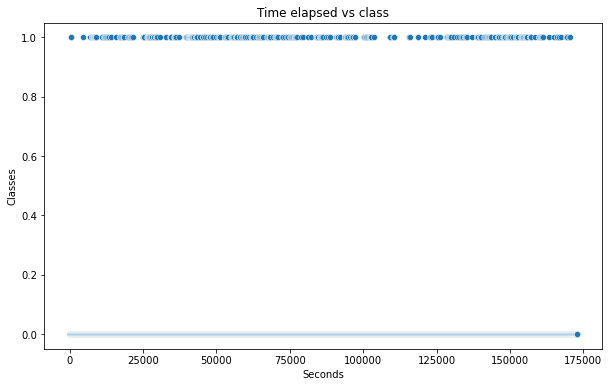

In [9]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize= (10,6))
sns.scatterplot(x=df['Time'],  y=df['Class'])
plt.xlabel('Seconds')
plt.ylabel('Classes')
plt.title('Time elapsed vs class',)
plt.show()

We can see in both the cases time elapsed between next transaction varies and we could not see any pattern over here.

#### Scatter plot for amount of transaction vs Classes

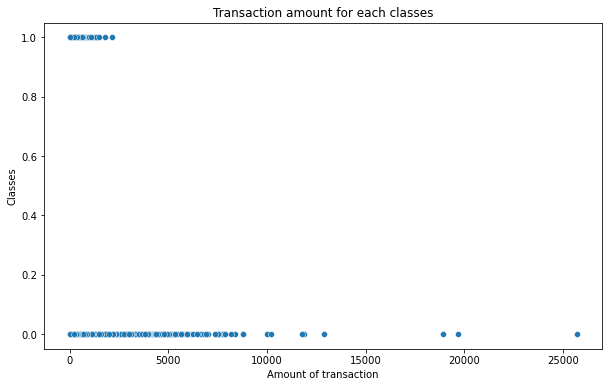

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize= (10,6))
sns.scatterplot(x=df['Amount'],  y=df['Class'])
plt.xlabel('Amount of transaction')
plt.ylabel('Classes')
plt.title('Transaction amount for each classes',)
plt.show()

We can see that in the case of Fradulent transaction small amounts are deducted. Maybe they do so to reduce the suspicion as higher amounts are more likely to be noticed.

 As the time variable doesn't provide much inoformation, We can go ahead and drop this column.

In [11]:
# Drop unnecessary columns

df.drop('Time',axis = 1,inplace = True)

### Splitting the data into train & test data

In [12]:
y= df.Class
x = df.drop('Class', axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


We need to scale the Amount column before proceeding as the other variables were scaled before PCA.

#### Scaling Amount Variable.

In [15]:
# Instanciatiog standard scaler 
standard_scale = StandardScaler()

# Fit Transform on the train set
X_train[['Amount']] = standard_scale.fit_transform(X_train[['Amount']])

# Transform on the test set
X_test[['Amount']] = standard_scale.transform(X_test[['Amount']])

In [16]:
X_train.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [17]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


##### Plotting the distribution of a variable

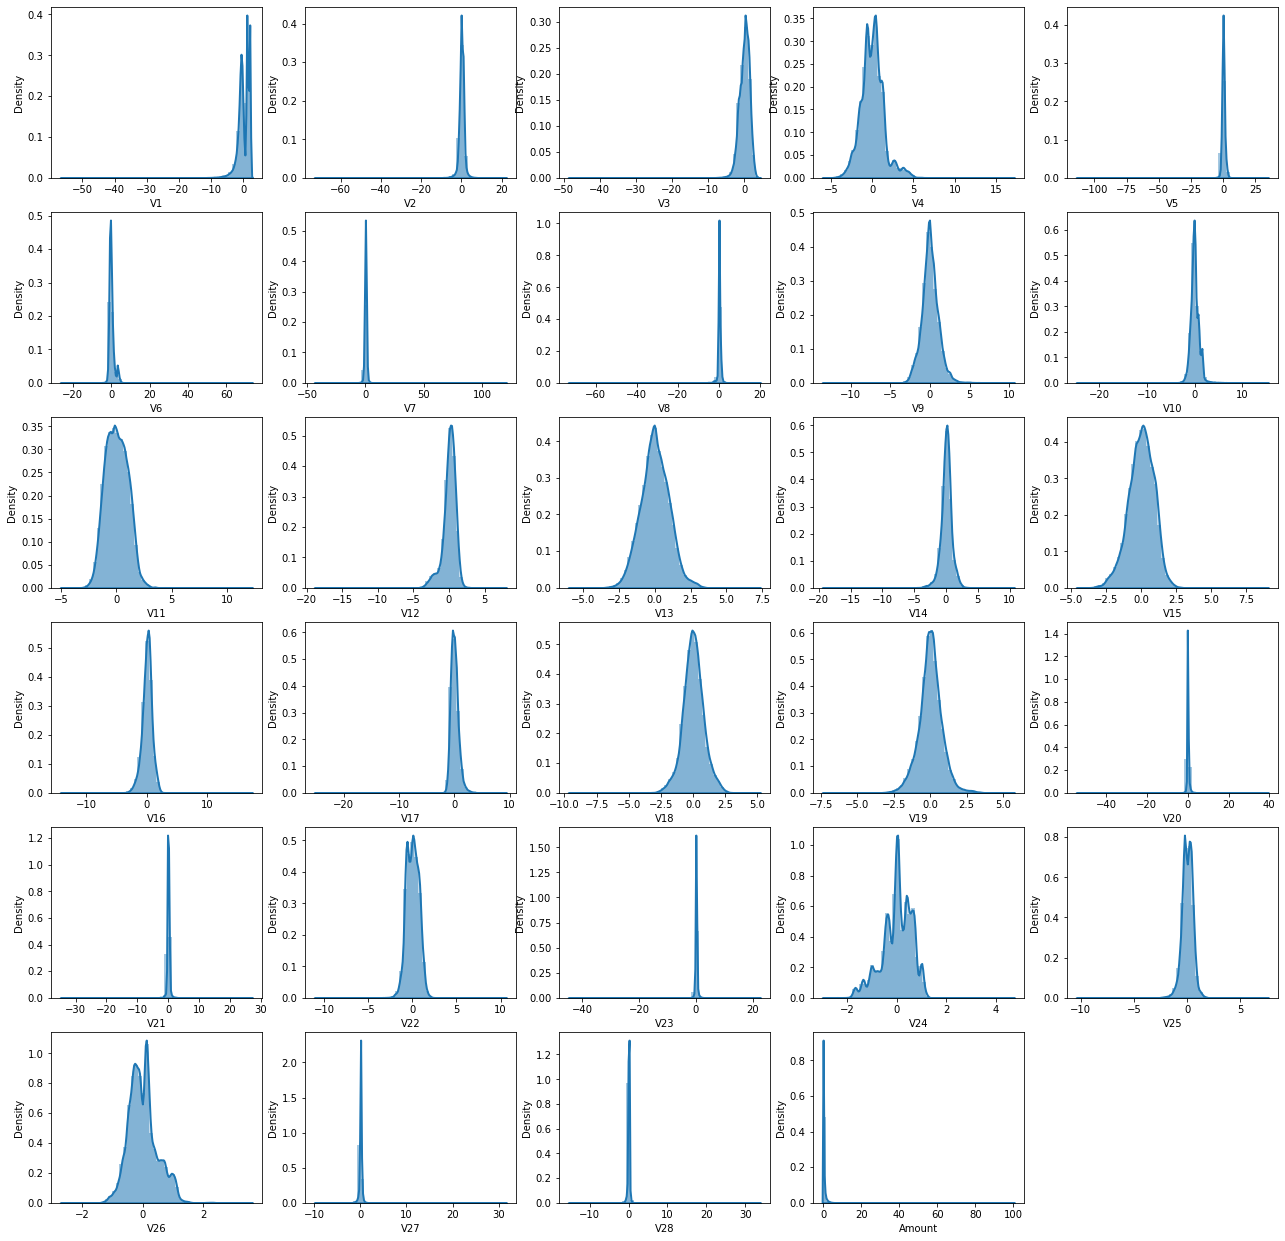

In [18]:
# plot the histogram of a variable from the dataset to see the skewness

variables = X_train.columns

plt.figure(figsize=(22,22))
index = 0 
for column in variables:
    index = index + 1
    plt.subplot(6,5,index)
    sns.distplot(X_train[column], kde = True, hist = True, kde_kws = {'shade': True, 'linewidth': 2} )
    
plt.show()

From the above histograms we can see that some of the variables are highly skewed and we need to perform some kind of transformations on them.

In [19]:
variables = X_train.columns
for columns in variables:
    print(columns,'Skewness -', X_train[columns].skew())
    

V1 Skewness - -3.320268996858459
V2 Skewness - -4.8268472115513354
V3 Skewness - -2.2193746131142826
V4 Skewness - 0.6777756794267003
V5 Skewness - -2.928646123276011
V6 Skewness - 1.9777245624004025
V7 Skewness - 3.744620476352219
V8 Skewness - -8.445013977689738
V9 Skewness - 0.5436034420832186
V10 Skewness - 1.212102149430583
V11 Skewness - 0.35952655399638084
V12 Skewness - -2.281333808477361
V13 Skewness - 0.06761178130091172
V14 Skewness - -1.992811756185892
V15 Skewness - -0.30805288271014397
V16 Skewness - -1.113874772002908
V17 Skewness - -3.975821016053735
V18 Skewness - -0.266115177761573
V19 Skewness - 0.10728924048031283
V20 Skewness - -1.9778587601675224
V21 Skewness - 3.656863137849789
V22 Skewness - -0.23000801488757894
V23 Skewness - -6.285467457756023
V24 Skewness - -0.5526678470300929
V25 Skewness - -0.41716791647621376
V26 Skewness - 0.579264669775594
V27 Skewness - -0.038329871117688784
V28 Skewness - 11.776522072710803
Amount Skewness - 18.352356489127448


The normal range of skewness is from the range of -1 to +1 and everthing after these range are skewed data.
Here, V1,V2,V3,V5,V6,V7.V8,V10,V12,V14,V16,V17,V20,V21,V23,V28 and Amount are skewed variables.

#### Applyig Power Transformer  

In [20]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

skewed = ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']
#Instanciating power transformer 
power_transform = PowerTransformer(copy = False)

# Applying power transform on the skewed data in the training set.
X_train[skewed] = power_transform.fit_transform(X_train[skewed])


# Transforming the test data.
X_test[skewed] = power_transform.transform(X_test[skewed])


##### Plotting histogram after applying the power transformer.

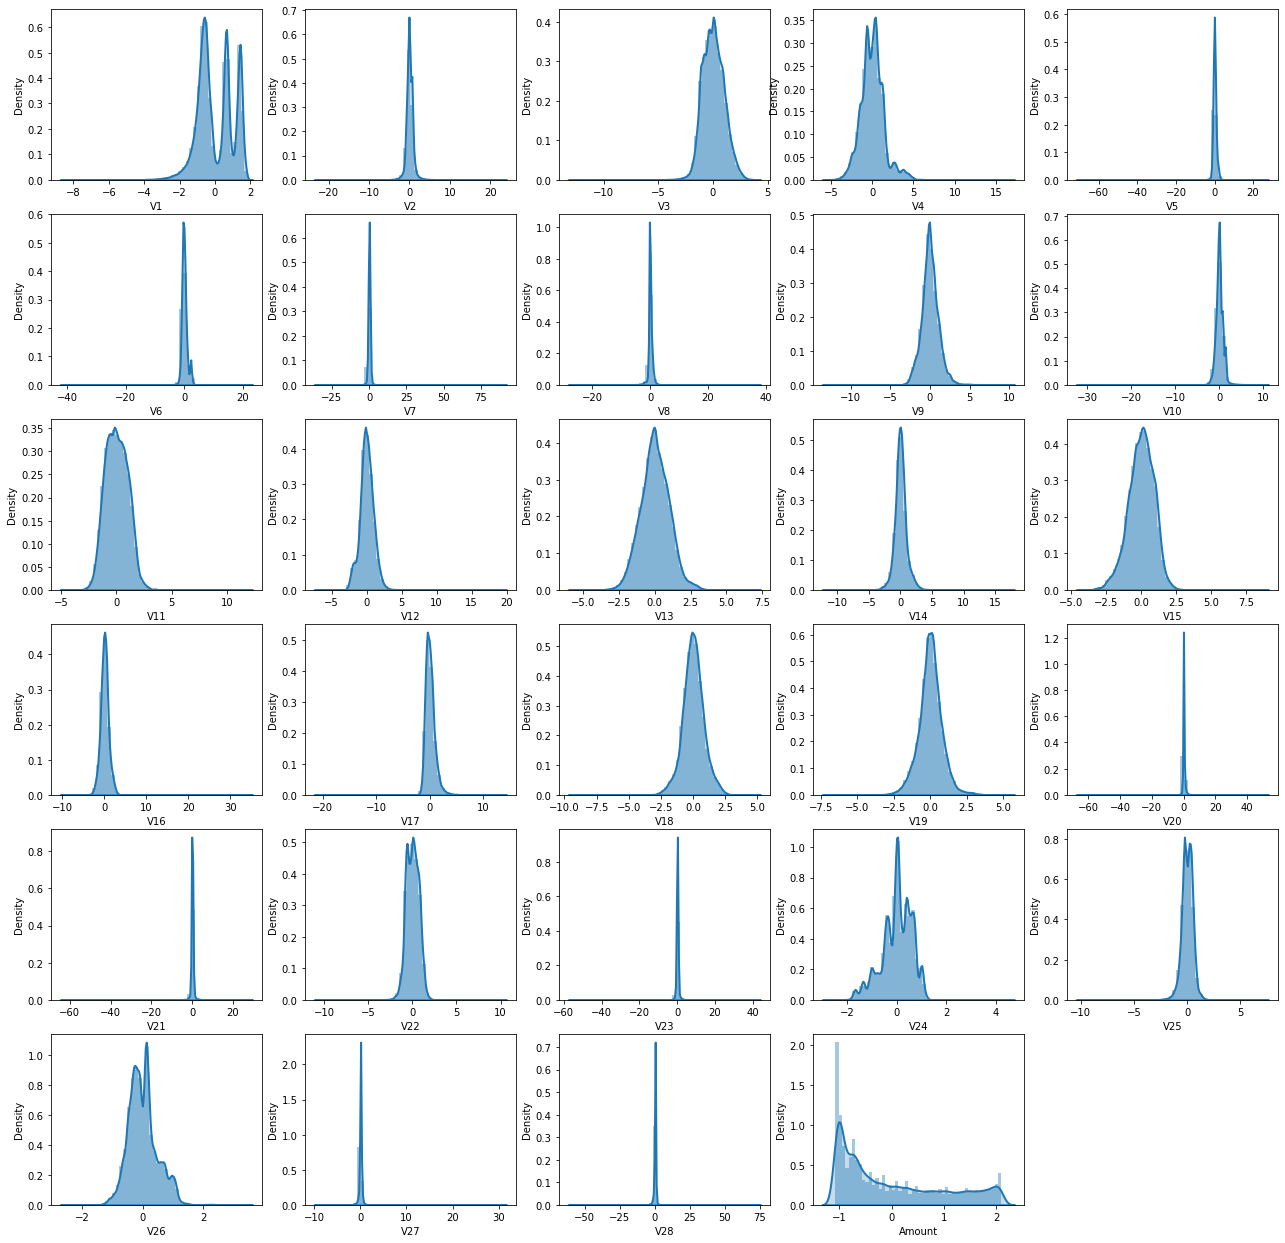

In [21]:
# plot the histogram of a variable from the dataset again to see the result 

variables = X_train.columns

plt.figure(figsize=(22,22))
index = 0 
for column in variables:
    index = index + 1
    plt.subplot(6,5,index)
    sns.distplot(X_train[column], kde = True, hist = True, kde_kws = {'shade': True, 'linewidth': 2} )
    
plt.show()

After applying the power transformer we can see that data has become less skewed

## Model Building with imbalanced data 


We are going to make severeal model using both the imbalanced data and balanced data.
There are several model which we won't consider while model building as they require a lot of time.

Evaluation metrics- 
We are going to use ROC-AUC score as it is not dependent on other metrics such as Precision and recall.


### 1. Logistic Regression

In [22]:
# Logistic Regression

parameters = { "C" : [0.01,0.1,1,10,10,100,1000] }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#perform GridSearchCV for a set of parameters

model = GridSearchCV(estimator = LogisticRegression(),
                    param_grid = parameters,
                    scoring = 'roc_auc',
                    cv = folds,
                    n_jobs=  -1,
                    verbose = 1,
                    return_train_score = True)

# Training the Model
model.fit(X_train,y_train)

#print the best score
print('Optimal score : ', model.best_score_)

#print the optimum value of hyperparameters

print('Optimal hyperparameter: ', model.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Optimal score :  0.9808868419804181
Optimal hyperparameter:  {'C': 0.01}


In [23]:
# Cross validation results
results = pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.731473,0.198661,0.050195,0.006454,0.01,{'C': 0.01},0.968649,0.987418,0.991888,0.972320,...,0.980887,0.008917,1,0.986560,0.981838,0.980641,0.986508,0.981480,0.983405,0.002584
1,4.188822,0.282884,0.057140,0.012852,0.1,{'C': 0.1},0.969796,0.982755,0.988625,0.964694,...,0.977179,0.008725,2,0.983257,0.978596,0.977881,0.985034,0.979206,0.980795,0.002824
2,4.762495,0.297735,0.045433,0.002422,1,{'C': 1},0.970928,0.981696,0.987179,0.962764,...,0.976174,0.008526,3,0.982013,0.977514,0.977196,0.984493,0.978452,0.979934,0.002851
3,4.612606,0.068543,0.054360,0.006585,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,...,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
4,4.567270,0.059791,0.049600,0.007728,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,...,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
5,4.762297,0.218675,0.049203,0.008043,100,{'C': 100},0.971157,0.981549,0.986970,0.962509,...,0.976049,0.008495,6,0.981831,0.977356,0.977118,0.984419,0.978347,0.979814,0.002854
6,3.613660,0.744319,0.025693,0.010429,1000,{'C': 1000},0.971160,0.981549,0.986968,0.962506,...,0.976048,0.008495,7,0.981829,0.977357,0.977117,0.984418,0.978345,0.979813,0.002854


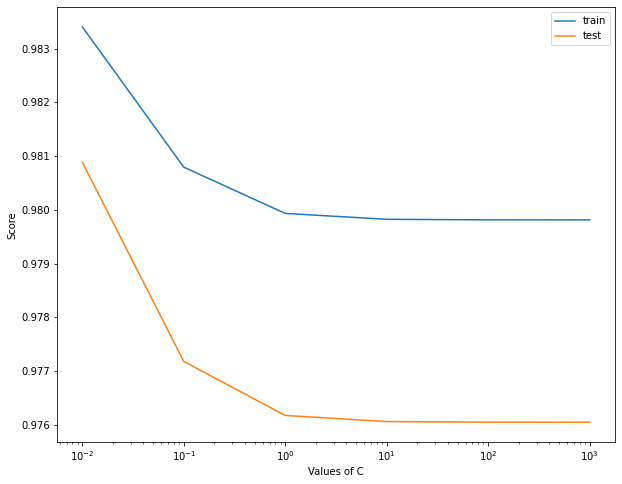

In [24]:
# Plotting the graph of C versus train and test scores

plt.figure(figsize = (10,8))
plt.plot(results['param_C'], results['mean_train_score'])
plt.plot(results['param_C'], results['mean_test_score'])
plt.xlabel('Values of C')
plt.ylabel('Score')
plt.legend(['train','test'])
plt.xscale('log')
plt.show()

In [25]:
# Using the optimal hyperparameter for logistic regression model.

logistic_model = LogisticRegression(C=0.01)
logistic_model.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [26]:
# Function for f1_score and classification report

def scores(actual,pred):
    print('F1 score - ' , round(f1_score(actual,pred),2))
    print('Classification report - \n\n', classification_report(actual,pred))
    
# Function for ROC curve 

def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('ROC curve')
    plt.show()
    return None

Making predictions on the train set

In [27]:
# Making prediction on the train set
y_train_pred = logistic_model.predict(X_train)

# Prediction probability of the train set
y_train_pred_proba = logistic_model.predict_proba(X_train)[:,1]

In [28]:
# F1 score and classification report for train data 
scores(y_train,y_train_pred)

F1 score -  0.74
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



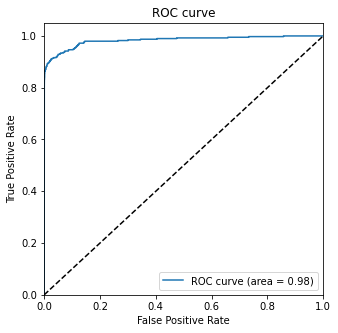

In [29]:
# Roc curve for the train set
from sklearn import metrics
roc(y_train,y_train_pred_proba)

Making prediction on the test set

In [30]:
# Making prediction on the test set
y_test_pred = logistic_model.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = logistic_model.predict_proba(X_test)[:,1]

In [31]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.7
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



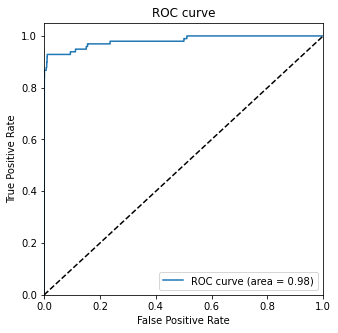

In [32]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : .98
             F1 score  :  .74
             
-Test set  :
            ROC score : .98
            F1 score  : .70

### 2. Decisoion Tree

In [33]:
# Choosing the parameters

parameters = {
    'min_samples_leaf' : range(50,150,50),
    'min_samples_split' : range(50,150,50),
    'max_depth' : range(5,15,5)
}


# Instanciating Decision Tree

tree = DecisionTreeClassifier(random_state = 42)

#Instanciating Grid search CV

model_tree = GridSearchCV(estimator = tree,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1,
                         )

# Fitting the model on the data

model_tree.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [34]:
# Cross validation results

results = pd.DataFrame(model_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.504115,0.186669,0.047947,0.007134,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.919716,0.951698,0.928013,0.016996,5
1,5.588104,0.133438,0.046128,0.001856,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.919716,0.951698,0.928013,0.016996,5
2,5.799235,0.208505,0.049435,0.003630,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,3
3,5.396318,0.175602,0.050095,0.007905,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,3
4,10.636725,0.281964,0.050757,0.011464,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934878,0.916397,0.908223,0.919832,0.011150,7
5,10.599856,0.126100,0.045136,0.001765,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934878,0.916397,0.908223,0.919832,0.011150,7
6,10.158748,0.724674,0.041663,0.006519,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963219,0.930720,0.915628,0.936522,0.019857,1
7,8.786812,0.105361,0.026948,0.003492,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963219,0.930720,0.915628,0.936522,0.019857,1


In [35]:
# Selecting the Optimal hyperparameter for the tree.

print(model_tree.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)


Making the tree with optimal hyperparameters

In [36]:
optimal_model_tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

optimal_model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

Making preictions on the train set

In [37]:
# Making prediction on the train set
y_train_pred = optimal_model_tree.predict(X_train)

# Prediction probability of the train set
y_train_pred_proba = optimal_model_tree.predict_proba(X_train)[:,1]

In [38]:
# F1 score and classification report for train data 
scores(y_train,y_train_pred)

F1 score -  0.72
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



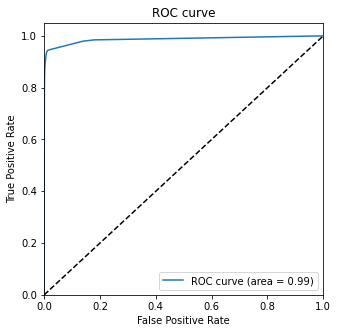

In [39]:
# Roc curve for the train set

roc(y_train,y_train_pred_proba)

In [40]:
# Making prediction on the test set
y_test_pred = optimal_model_tree.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = optimal_model_tree.predict_proba(X_test)[:,1]

In [41]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.72
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



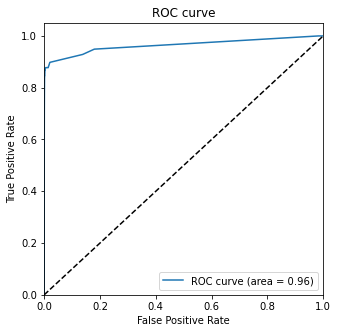

In [42]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : .99
             F1 score  :  .72
             
-Test set  :
            ROC score : .96
            F1 score  : .72

### 3. XGBoost

In [43]:
# Choosing the parameters

parameters = {
    'subsample': [0.3, 0.6, 0.9],
    'learning_rate': [0.2, 0.6],
    
    
             }


# Instanciating XGBoost model

xgboost = XGBClassifier(max_depth=2, n_estimators=200,random_state = 42)

#Instanciating Grid search CV

xgboost_model = GridSearchCV(estimator = xgboost,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1,
                         return_train_score = True)

# Fitting the model on the data

xgboost_model.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None

In [44]:
# Cross validation results

results = pd.DataFrame(xgboost_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,93.214983,0.414519,0.194763,0.007515,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.977503,0.954074,0.985795,0.972457,0.013433,5,0.999771,0.999759,0.999584,0.999705,0.000085
1,103.045046,1.021169,0.189141,0.015863,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978731,0.970708,0.987424,0.978954,0.006826,2,0.999934,0.999955,0.999926,0.999938,0.000012
2,109.001845,0.629882,0.179718,0.031610,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980400,0.967986,0.989061,0.979149,0.008649,1,0.999921,0.999937,0.999856,0.999905,0.000035
3,94.064299,1.061755,0.179056,0.016381,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.970255,0.951654,0.984266,0.968725,0.013358,6,0.999981,0.999992,0.999993,0.999989,0.000005
4,100.557937,0.793785,0.171616,0.024604,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975006,0.967707,0.980855,0.974523,0.005379,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,67.950218,24.511013,0.119040,0.023162,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.978694,0.961233,0.986371,0.975432,0.010518,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [45]:
# Selecting the Optimal hyperparameter for the XGBoost model.

print(xgboost_model.best_params_)

{'learning_rate': 0.2, 'subsample': 0.9}


Making the model with optimal hyperparameters

In [46]:
# Making the model with the optimal hyperparameters


optimal_xgboost = XGBClassifier(learning_rate = 0.2,
                                max_depth = 3,
                                n_estimators = 200,
                                subsample =  0.9,
                                eval_metric = 'auc')

# Fitting the model on hyperparameters

optimal_xgboost.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Making predictions on the train set

In [47]:
# Making prediction on the train set
y_train_pred = optimal_xgboost.predict(X_train)

# Prediction probability of the train set
y_train_pred_proba = optimal_xgboost.predict_proba(X_train)[:,1]

In [48]:
# F1 score and classification report for train data 
scores(y_train,y_train_pred)

F1 score -  0.99
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.98      0.99       394

    accuracy                           1.00    227845
   macro avg       1.00      0.99      0.99    227845
weighted avg       1.00      1.00      1.00    227845



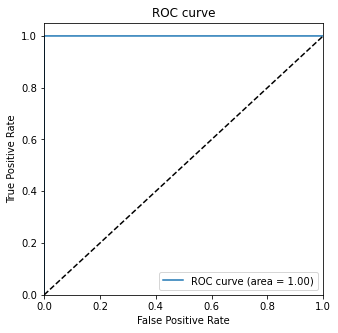

In [49]:
# Roc curve for the train set

roc(y_train,y_train_pred_proba)

Making predictions on the test set

In [50]:
# Making prediction on the test set
y_test_pred = optimal_xgboost.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = optimal_xgboost.predict_proba(X_test)[:,1]

In [51]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.88
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



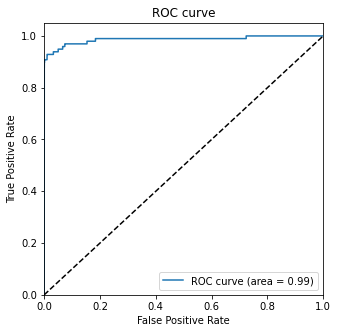

In [52]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : 1
             F1 score  :  .99
             
-Test set  :
            ROC score : .99
            F1 score  : .88

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


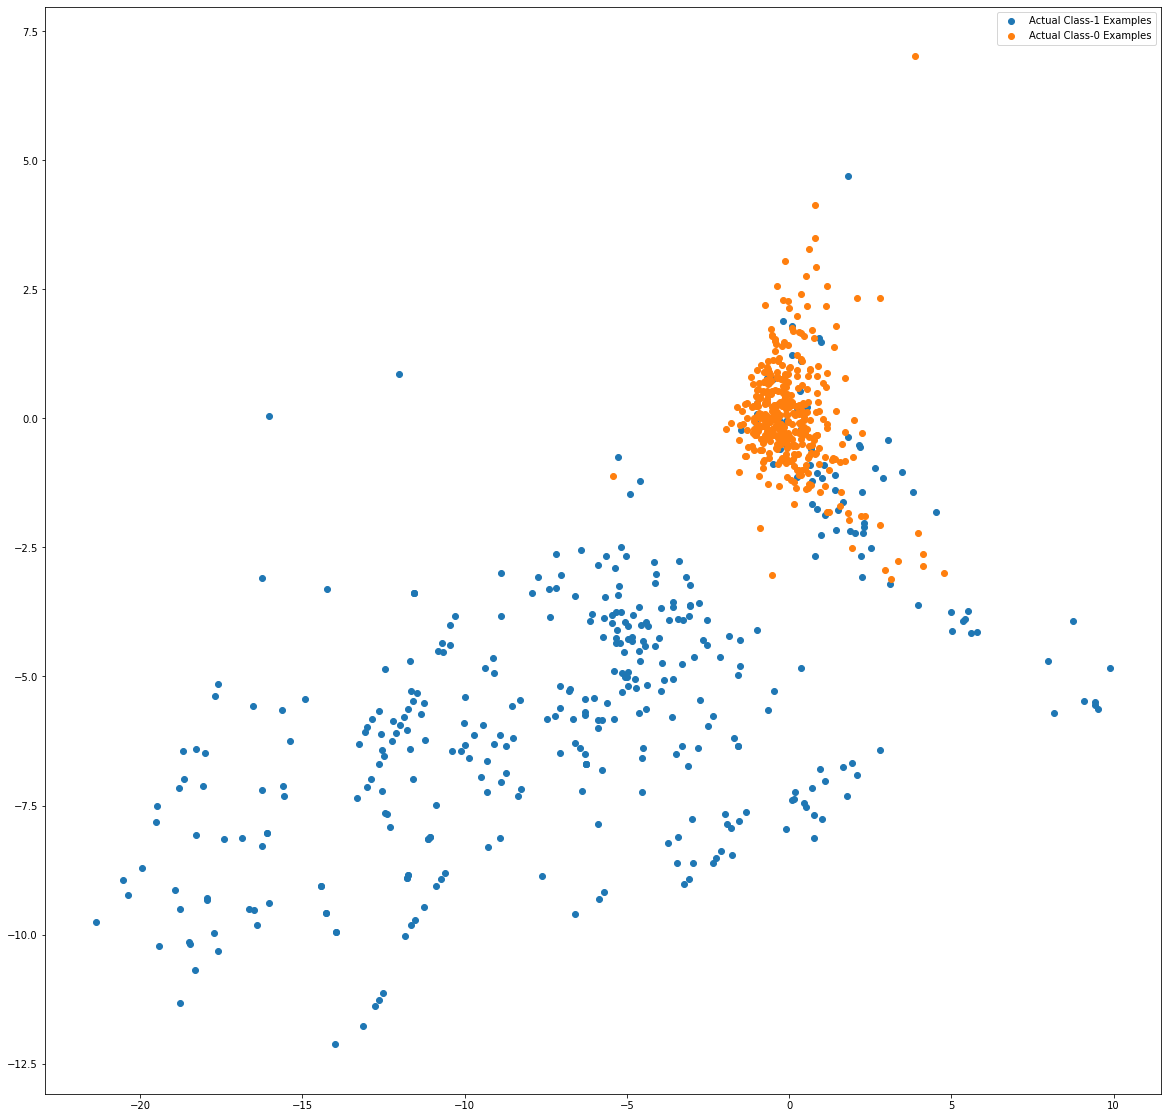

In [53]:
var_imp = []
for i in optimal_xgboost.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(optimal_xgboost.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(optimal_xgboost.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(optimal_xgboost.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(optimal_xgboost.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(optimal_xgboost.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [54]:
from imblearn.over_sampling import RandomOverSampler

# Defining strategy for oversampling
over = RandomOverSampler(sampling_strategy = 'minority')

# fitting and transforming the data
X_oversample, y_oversample = over.fit_resample(X_train, y_train)



# Importing counter
from collections import Counter

#Printing the classes before oversampling
print('Earlier sampling class distribution : ', Counter(y_train))

#Printing the classes after oversampling 
print('New class distribution : ', Counter(y_oversample))

Earlier sampling class distribution :  Counter({0: 227451, 1: 394})
New class distribution :  Counter({0: 227451, 1: 227451})


### 1. Logistic Regression with OverSampling

In [55]:
# Logistic Regression

parameters = { "C" : [0.01,0.1,1,10,10,100,1000] }

folds = KFold(n_splits = 5, shuffle = True, random_state = 40)

#perform Grid Search CV
model = GridSearchCV(estimator = LogisticRegression(),
                    param_grid = parameters,
                    scoring = 'roc_auc',
                    cv = folds,
                    n_jobs=  -1,
                    verbose = 1,
                    return_train_score = True)

# Training the model
model.fit(X_oversample,y_oversample)

# Printing the best score

print('Optimal score : ', model.best_score_)

#print the optimum value of hyperparameters

print('Optimal hyperparameter: ', model.best_params_)



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Optimal score :  0.987005781528687
Optimal hyperparameter:  {'C': 100}


In [56]:
# Cross validation results
results = pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.680998,0.203337,0.103068,0.012459,0.01,{'C': 0.01},0.986981,0.986677,0.987128,0.986651,...,0.986853,0.000181,7,0.986900,0.986865,0.986793,0.986903,0.986882,0.986869,0.00004
1,8.570884,0.361465,0.099298,0.011877,0.1,{'C': 0.1},0.987109,0.986823,0.987249,0.986787,...,0.986989,0.000173,6,0.987034,0.986992,0.986926,0.987035,0.987010,0.987000,0.00004
2,9.108648,0.434609,0.119735,0.019498,1,{'C': 1},0.987124,0.986839,0.987262,0.986800,...,0.987004,0.000173,5,0.987050,0.987005,0.986941,0.987049,0.987025,0.987014,0.00004
3,9.133151,1.533137,0.184809,0.153053,10,{'C': 10},0.987125,0.986840,0.987264,0.986801,...,0.987006,0.000173,3,0.987051,0.987007,0.986942,0.987051,0.987026,0.987015,0.00004
4,9.269253,1.019005,0.159514,0.063283,10,{'C': 10},0.987125,0.986840,0.987264,0.986801,...,0.987006,0.000173,3,0.987051,0.987007,0.986942,0.987051,0.987026,0.987015,0.00004
5,9.905521,0.748519,0.123110,0.034905,100,{'C': 100},0.987125,0.986841,0.987264,0.986802,...,0.987006,0.000173,1,0.987051,0.987007,0.986942,0.987051,0.987026,0.987015,0.00004
6,7.612316,1.585492,0.062990,0.027252,1000,{'C': 1000},0.987125,0.986841,0.987264,0.986802,...,0.987006,0.000173,2,0.987051,0.987007,0.986942,0.987051,0.987027,0.987015,0.00004


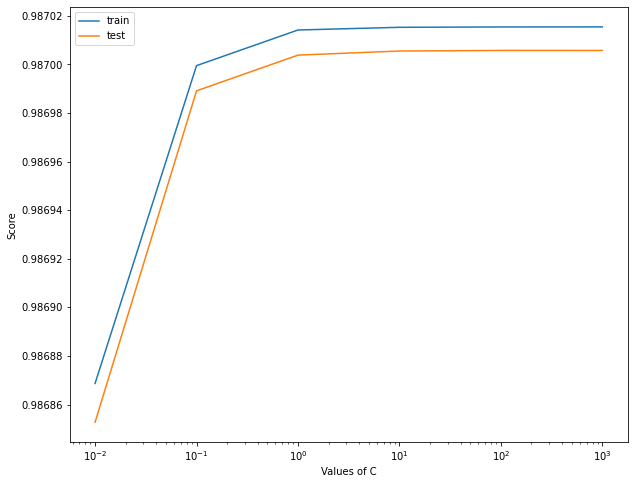

In [57]:
# Plotting the graph of C versus train and test scores

plt.figure(figsize = (10,8))
plt.plot(results['param_C'], results['mean_train_score'])
plt.plot(results['param_C'], results['mean_test_score'])
plt.xlabel('Values of C')
plt.ylabel('Score')
plt.legend(['train','test'])
plt.xscale('log')
plt.show()

In [58]:
# Using the optimal hyperparameter for logistic regression model.

logistic_model_over = LogisticRegression(C=1000)
logistic_model_over.fit(X_oversample,y_oversample)

LogisticRegression(C=1000)

Making predictions on the train set

In [59]:
# Making prediction on the train set
y_train_pred = logistic_model_over.predict(X_oversample)

# Prediction probability of the train set
y_train_pred_proba = logistic_model_over.predict_proba(X_oversample)[:,1]

In [60]:
# F1 score and classification report for train data 
scores(y_oversample,y_train_pred)

F1 score -  0.94
Classification report - 

               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



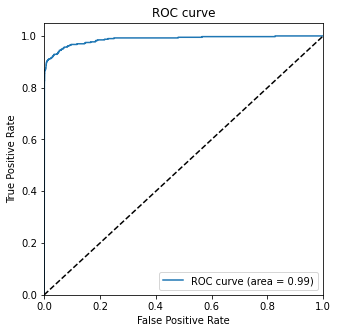

In [61]:
# Roc curve for the train set

roc(y_oversample,y_train_pred_proba)

Making prediction on the test set

In [62]:
# Making prediction on the test set
y_test_pred = logistic_model_over.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = logistic_model_over.predict_proba(X_test)[:,1]

In [63]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.11
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



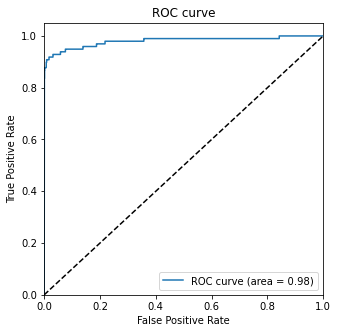

In [64]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : .99
             F1 score  :  .94
             
-Test set  :
            ROC score : .98
            F1 score  : .11

### 2. Decision Tree with Random Oversampling

In [65]:
# Choosing the parameters

parameters = {
    'min_samples_leaf' : range(50,150,50),
    'min_samples_split' : range(50,150,50),
    'max_depth' : range(5,15,5)
}


# Instanciating Decision Tree

tree_over = DecisionTreeClassifier()

#Instanciating Grid search CV

model_treeover = GridSearchCV(estimator = tree_over,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1)

# Fitting the model on the data

model_treeover.fit(X_oversample,y_oversample)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [66]:
# Cross validation results

results = pd.DataFrame(model_treeover.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.172698,0.170583,0.172940,0.026424,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987397,0.987284,0.986982,0.987221,0.000175,5
1,8.896590,0.231211,0.148800,0.017888,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987397,0.987284,0.986940,0.987207,0.000195,6
2,8.977770,0.303363,0.134251,0.037751,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987282,0.987238,0.986879,0.987133,0.000181,8
3,9.052996,0.052247,0.118544,0.007977,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987287,0.987238,0.986881,0.987136,0.000181,7
4,15.539357,0.243534,0.142518,0.025550,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998741,0.999308,0.998495,0.998848,0.000341,2
5,14.981192,0.499785,0.129456,0.023832,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998708,0.999281,0.998522,0.998837,0.000323,3
6,14.854382,0.160277,0.120032,0.020550,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998612,0.999394,0.998501,0.998836,0.000397,4
7,14.823249,0.077054,0.129672,0.014236,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998669,0.999382,0.998526,0.998859,0.000374,1


In [67]:
# Selecting the Optimal hyperparameter for the tree.

print(model_treeover.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


Making the tree with optimal hyperparameters

In [68]:
optimal_treeover = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

optimal_treeover.fit(X_oversample, y_oversample)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

Making preictions on the train set

In [69]:
# Making prediction on the train set
y_train_pred = optimal_treeover.predict(X_oversample)

# Prediction probability of the train set
y_train_pred_proba = optimal_treeover.predict_proba(X_oversample)[:,1]

In [70]:
# F1 score and classification report for train data 
scores(y_oversample,y_train_pred)

F1 score -  0.99
Classification report - 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



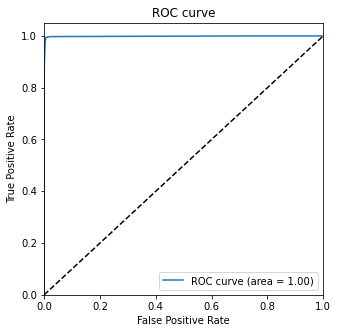

In [71]:
# Roc curve for the train set

roc(y_oversample,y_train_pred_proba)

In [72]:
# Making prediction on the test set
y_test_pred = optimal_treeover.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = optimal_treeover.predict_proba(X_test)[:,1]

In [73]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.29
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.82      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



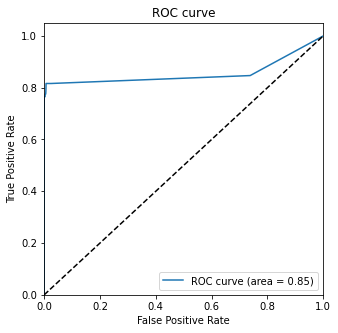

In [74]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : 1
             F1 score  :  .99
             
-Test set  :
            ROC score : .90
            F1 score  : .28

### 3. XGBoost with Oversampling

In [75]:
# Choosing the parameters

parameters = {
    'subsample': [0.3, 0.6, 0.9],
    'learning_rate': [0.2, 0.6],
    
    
             }


# Instanciating XGBoost model

xgboost = XGBClassifier(max_depth=2, n_estimators=200)

#Instanciating Grid search CV

xgboost_overmodel = GridSearchCV(estimator = xgboost,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1,
                         return_train_score = True)

# Fitting the model on the data

xgboost_overmodel.fit(X_oversample,y_oversample)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [76]:
# Cross validation results

results = pd.DataFrame(xgboost_overmodel.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,215.034137,0.161065,0.630582,0.077682,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999888,0.999906,0.999868,0.999887,0.000016,5,0.999899,0.999911,0.999893,0.999901,0.000007
1,228.765574,1.132894,0.577675,0.040845,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999884,0.999895,0.999886,0.999889,0.000005,4,0.999899,0.999910,0.999912,0.999907,0.000006
2,219.584609,21.401453,0.515675,0.082129,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999900,0.999880,0.999875,0.999885,0.000011,6,0.999912,0.999897,0.999895,0.999901,0.000007
3,169.172630,0.989264,0.444085,0.094316,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999973,0.999978,0.999979,0.999977,0.000002,3,0.999999,0.999991,0.999996,0.999996,0.000003
4,179.925750,0.743987,0.393493,0.074372,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999981,0.999985,0.999988,0.999984,0.000003,1,0.999999,0.999994,0.999998,0.999997,0.000002
5,109.371200,50.362631,0.231301,0.033288,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999989,0.999983,0.999975,0.999982,0.000006,2,0.999999,0.999997,0.999992,0.999996,0.000003


In [77]:
# Selecting the Optimal hyperparameter for the XGBoost model.

print(xgboost_overmodel.best_params_)

{'learning_rate': 0.6, 'subsample': 0.6}


Making the model with optimal hyperparameters

In [78]:
# Making the model with the optimal hyperparameters


optimal_overxgboost = XGBClassifier(learning_rate = 0.6,
                                max_depth = 3,
                                n_estimators = 200,
                                subsample =  0.9,
                                eval_metric = 'auc')

# Fitting the model on hyperparameters

optimal_overxgboost.fit(X_oversample,y_oversample)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Making predictions on the train set

In [158]:
# Making prediction on the train set
y_train_pred = optimal_overxgboost.predict(X_oversample)

# Prediction probability of the train set
y_train_pred_proba_over = optimal_overxgboost.predict_proba(X_oversample)[:,1]

In [82]:
# F1 score and classification report for train data 
scores(y_oversample,y_train_pred)

F1 score -  1.0
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



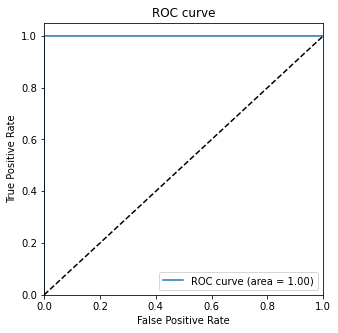

In [159]:
# Roc curve for the train set

roc(y_oversample,y_train_pred_proba_over)

Making predictions on the test set

In [155]:
# Making prediction on the test set
y_test_pred = optimal_overxgboost.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = optimal_overxgboost.predict_proba(X_test)[:,1]

In [156]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.87
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



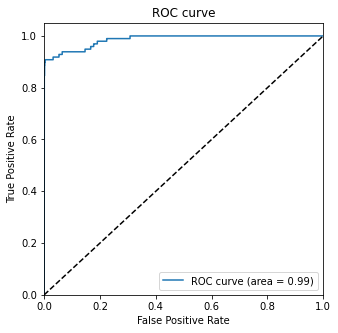

In [157]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : 1
             F1 score  :  1
             
-Test set  :
            ROC score : .98
            F1 score  : .86

### SMOTE

#### Print the class distribution after applying SMOTE 

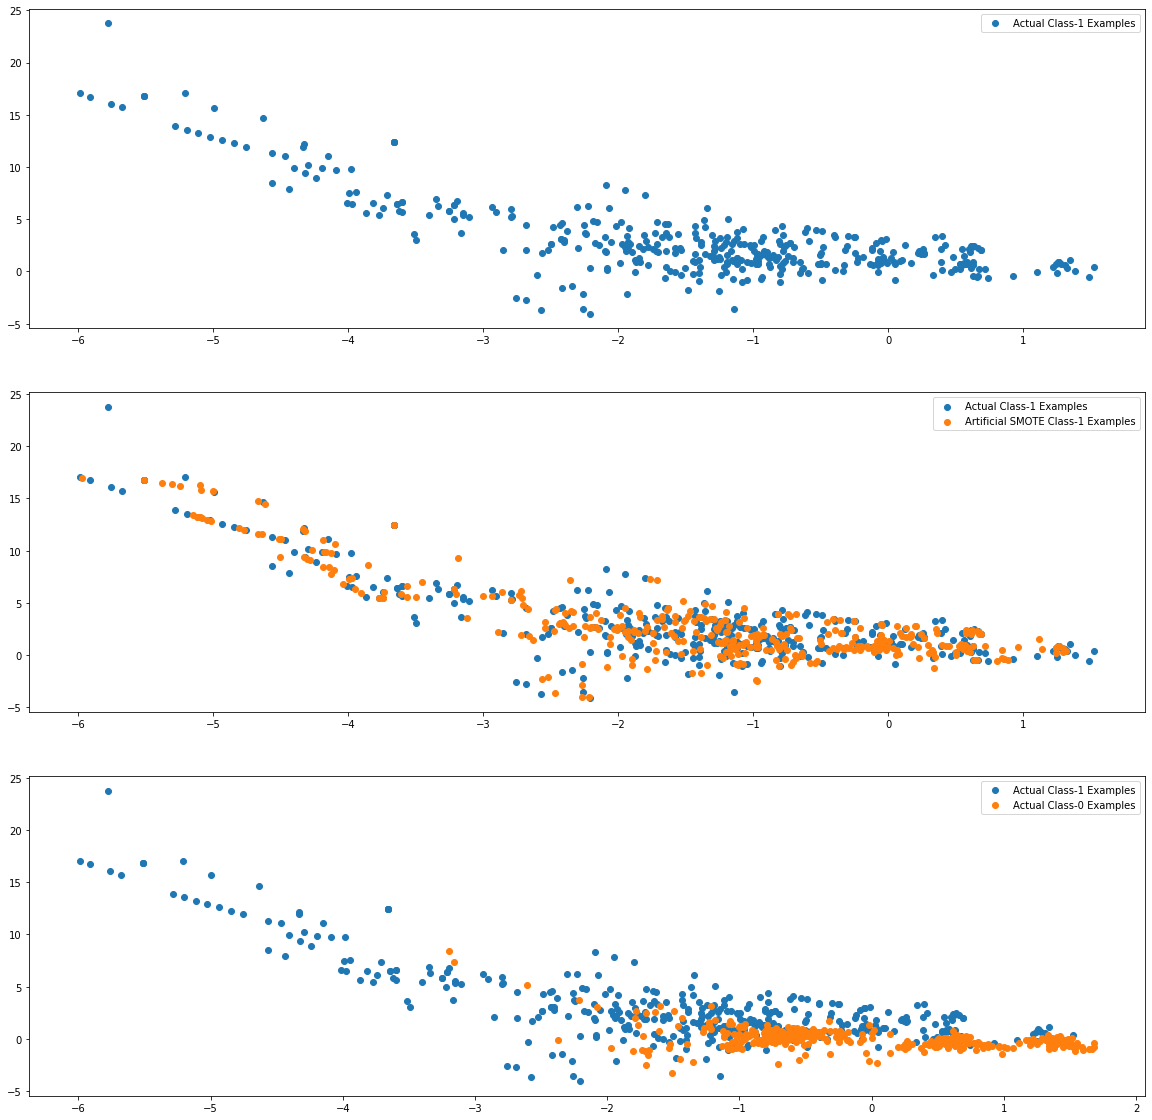

In [87]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()


### 1. Logistic Regression with SMOTE

In [88]:
# Logistic Regression

parameters = { "C" : [0.01,0.1,1,10,10,100,1000] }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#perform GridSearchCV for a set of parameters

model = GridSearchCV(estimator = LogisticRegression(),
                    param_grid = parameters,
                    scoring = 'roc_auc',
                    cv = folds,
                    n_jobs=  -1,
                    verbose = 1,
                    return_train_score = True)

# Training the Model
model.fit(X_train_smote,y_train_smote)

#print the best score
print('Optimal score : ', model.best_score_)

#print the optimum value of hyperparameters

print('Optimal hyperparameter: ', model.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Optimal score :  0.9889852507920895
Optimal hyperparameter:  {'C': 100}


In [89]:
# Cross validation results
results = pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.540528,0.381177,0.115766,0.017984,0.01,{'C': 0.01},0.988651,0.989120,0.989007,0.988704,...,0.988873,0.000177,7,0.988979,0.988788,0.988797,0.988914,0.988955,0.988887,0.00008
1,9.471722,0.726360,0.136399,0.042286,0.1,{'C': 0.1},0.988757,0.989219,0.989093,0.988807,...,0.988974,0.000173,6,0.989079,0.988894,0.988893,0.989012,0.989060,0.988987,0.00008
2,9.839255,0.299068,0.123406,0.005262,1,{'C': 1},0.988768,0.989229,0.989101,0.988817,...,0.988984,0.000172,5,0.989089,0.988905,0.988903,0.989022,0.989071,0.988998,0.00008
3,9.252588,0.589171,0.128662,0.021175,10,{'C': 10},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,3,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
4,9.594729,0.095509,0.117154,0.008350,10,{'C': 10},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,3,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
5,9.583021,0.362824,0.112692,0.005464,100,{'C': 100},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,1,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
6,6.907994,1.855086,0.069241,0.030034,1000,{'C': 1000},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,2,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008


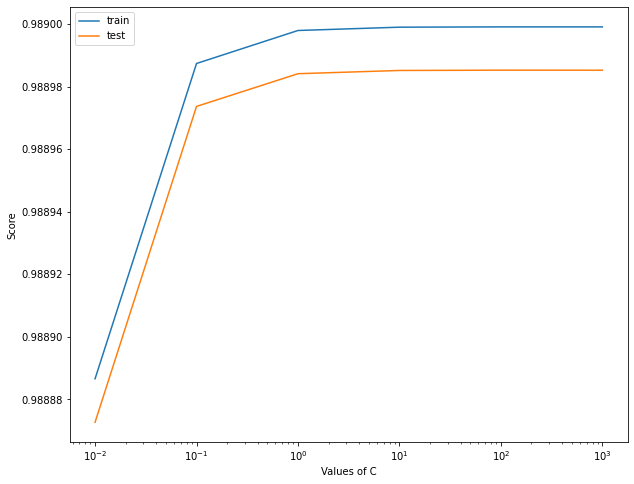

In [90]:
# Plotting the graph of C versus train and test scores

plt.figure(figsize = (10,8))
plt.plot(results['param_C'], results['mean_train_score'])
plt.plot(results['param_C'], results['mean_test_score'])
plt.xlabel('Values of C')
plt.ylabel('Score')
plt.legend(['train','test'])
plt.xscale('log')
plt.show()

 Best logistic regression model

In [91]:
# Using the optimal hyperparameter for logistic regression model.

logistic_smotemodel = LogisticRegression(C=100)
logistic_smotemodel.fit(X_train_smote,y_train_smote)

LogisticRegression(C=100)

Making predictions on the train set

In [92]:
# Making prediction on the train set
y_train_pred = logistic_smotemodel.predict(X_train_smote)

# Prediction probability of the train set
y_train_pred_proba = logistic_smotemodel.predict_proba(X_train_smote)[:,1]

In [93]:
# F1 score and classification report for train data 
scores(y_train_smote,y_train_pred)

F1 score -  0.94
Classification report - 

               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



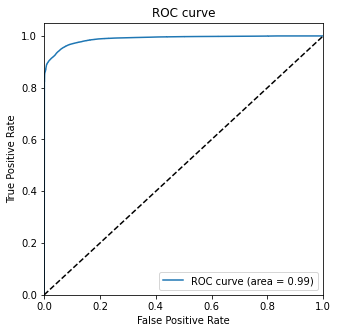

In [94]:
# Roc curve for the train set

roc(y_train_smote,y_train_pred_proba)

Making prediction on the test set

In [95]:
# Making prediction on the test set
y_test_pred = logistic_smotemodel.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = logistic_smotemodel.predict_proba(X_test)[:,1]

In [96]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.1
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



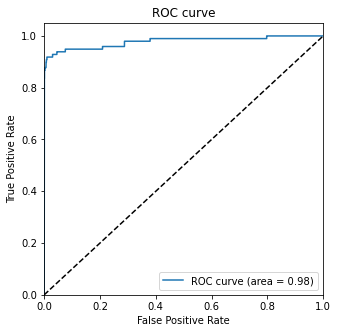

In [97]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : .99
             F1 score  :  .94
             
-Test set  :
            ROC score : .98
            F1 score  : .10

For both the test and train set we can see the AUC score comes out to be 0.98 which is good.

### 2. Decisoion Tree with SMOTE

In [98]:
# Choosing the parameters

parameters = {
    'min_samples_leaf' : range(50,150,50),
    'min_samples_split' : range(50,150,50),
    'max_depth' : range(5,15,5)
}


# Instanciating Decision Tree

tree = DecisionTreeClassifier()

#Instanciating Grid search CV

model_tree = GridSearchCV(estimator = tree,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1)

# Fitting the model on the data

model_tree.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [99]:
# Cross validation results

results = pd.DataFrame(model_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,13.900407,0.204122,0.148636,0.030122,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983447,0.983536,0.986122,0.984368,0.001240,5
1,13.997623,0.448110,0.121355,0.011486,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983447,0.983534,0.986122,0.984368,0.001241,6
2,13.470706,0.242309,0.112592,0.017555,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983414,0.983482,0.986062,0.984319,0.001232,7
3,13.417633,0.178969,0.112592,0.010341,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983414,0.983482,0.986062,0.984319,0.001232,7
4,24.362044,0.394250,0.113419,0.008508,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997700,0.997633,0.997521,0.997618,0.000074,1
5,24.646419,0.494146,0.115402,0.025971,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997754,0.997627,0.997430,0.997603,0.000133,2
6,22.638444,1.447844,0.096058,0.017844,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997516,0.997645,0.997291,0.997484,0.000146,4
7,20.059906,0.460014,0.064485,0.009636,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997598,0.997646,0.997285,0.997509,0.000160,3


In [100]:
# Selecting the Optimal hyperparameter for the tree.

print(model_tree.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


Making the tree with optimal hyperparameters

In [101]:
smote_tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

smote_tree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

Making preictions on the train set

In [102]:
# Making prediction on the train set
y_train_pred = smote_tree.predict(X_train_smote)

# Prediction probability of the train set
y_train_pred_proba = smote_tree.predict_proba(X_train_smote)[:,1]

In [103]:
# F1 score and classification report for train data 
scores(y_train_smote,y_train_pred)

F1 score -  0.99
Classification report - 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



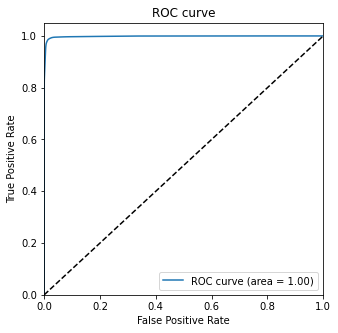

In [104]:
# Roc curve for the train set

roc(y_train_smote,y_train_pred_proba)

In [105]:
# Making prediction on the test set
y_test_pred = smote_tree.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = smote_tree.predict_proba(X_test)[:,1]

In [106]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.16
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



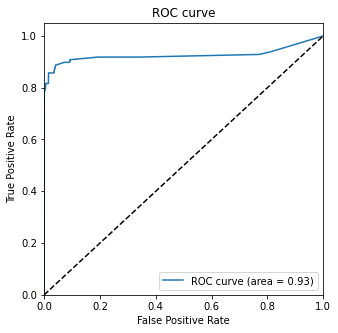

In [107]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : 1
             F1 score  :  .99
             
-Test set  :
            ROC score : .93
            F1 score  : .16

### 3. XGBoost with SMOTE

In [108]:
# Choosing the parameters

parameters = {
    'subsample': [0.3, 0.6, 0.9],
    'learning_rate': [0.2, 0.6],
    
    
             }


# Instanciating XGBoost model

xgboost = XGBClassifier(max_depth=2, n_estimators=200)

#Instanciating Grid search CV

xgboost_model = GridSearchCV(estimator = xgboost,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1,
                         return_train_score = True)

# Fitting the model on the data

xgboost_model.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[21:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [109]:
# Cross validation results

results = pd.DataFrame(xgboost_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,239.252011,0.643259,0.558827,0.094480,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999563,0.999629,0.999578,0.999590,0.000028,4,0.999630,0.999636,0.999620,0.999629,0.000007
1,271.791612,1.227290,0.539484,0.064207,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999529,0.999570,0.999548,0.999549,0.000016,5,0.999595,0.999571,0.999596,0.999587,0.000011
2,289.617697,2.039139,0.502282,0.038651,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999519,0.999577,0.999538,0.999544,0.000024,6,0.999586,0.999595,0.999586,0.999589,0.000004
3,235.727930,0.782849,0.601318,0.052974,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999919,0.999945,0.999931,0.999932,0.000011,3,0.999968,0.999971,0.999955,0.999964,0.000007
4,259.742113,3.741530,0.434331,0.073921,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999943,0.999944,0.999938,0.999942,0.000003,1,0.999974,0.999970,0.999967,0.999970,0.000002
5,177.054569,60.746277,0.225680,0.048094,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999937,0.999935,0.999940,0.999938,0.000002,2,0.999970,0.999966,0.999971,0.999969,0.000002


In [110]:
# Selecting the Optimal hyperparameter for the XGBoost model.

print(xgboost_model.best_params_)

{'learning_rate': 0.6, 'subsample': 0.6}


Making the model with optimal hyperparameters

In [111]:
# Making the model with the optimal hyperparameters


smote_xgboost = XGBClassifier(learning_rate = 0.6,
                                max_depth = 2,
                                n_estimators = 200,
                                subsample =  0.6,
                                eval_metric = 'auc')

# Fitting the model on hyperparameters

smote_xgboost.fit(X_train_smote,y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

Making predictions on the train set

In [112]:
# Making prediction on the train set
y_train_pred = smote_xgboost.predict(X_train_smote)

# Prediction probability of the train set
y_train_pred_proba = smote_xgboost.predict_proba(X_train_smote)[:,1]

In [113]:
# F1 score and classification report for train data 
scores(y_train_smote,y_train_pred)

F1 score -  1.0
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



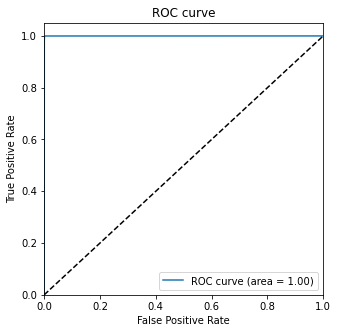

In [114]:
# Roc curve for the train set

roc(y_train_smote,y_train_pred_proba)

Making predictions on the test set

In [115]:
# Making prediction on the test set
y_test_pred = smote_xgboost.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = smote_xgboost.predict_proba(X_test)[:,1]

In [116]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.5
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.85      0.50        98

    accuracy                           1.00     56962
   macro avg       0.68      0.92      0.75     56962
weighted avg       1.00      1.00      1.00     56962



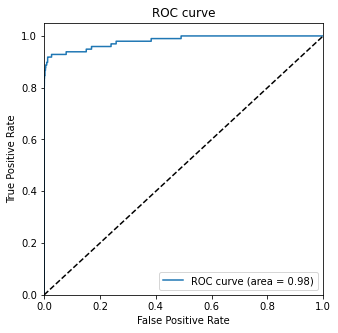

In [117]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : 1
             F1 score  : 1
             
-Test set  :
            ROC score : .98
            F1 score  : .5

### ADASYN

#### Print the class distribution after applying ADASYN

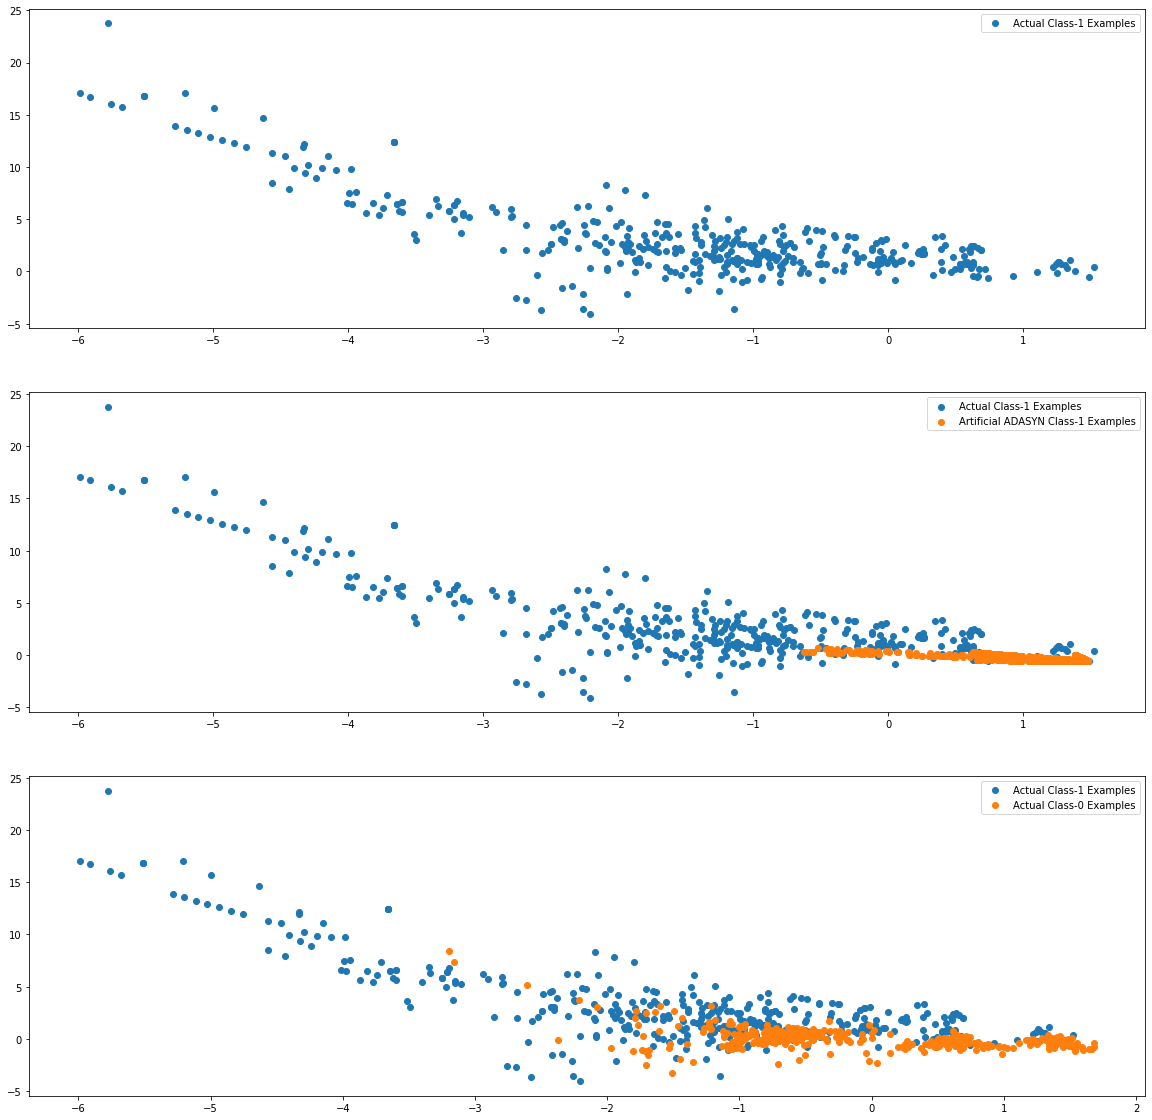

In [118]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

### 1. Logistic Regression with ADASYN

In [119]:
# Logistic Regression

parameters = { "C" : [0.01,0.1,1,10,10,100,1000] }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#perform GridSearchCV for a set of parameters

model = GridSearchCV(estimator = LogisticRegression(),
                    param_grid = parameters,
                    scoring = 'roc_auc',
                    cv = folds,
                    n_jobs=  -1,
                    verbose = 1,
                    return_train_score = True)

# Training the Model
model.fit(X_train_adasyn,y_train_adasyn)

#print the best score
print('Optimal score : ', model.best_score_)

#print the optimum value of hyperparameters

print('Optimal hyperparameter: ', model.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Optimal score :  0.9616398740341534
Optimal hyperparameter:  {'C': 1000}


In [120]:
# Cross validation results
results = pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.403038,0.394120,0.123801,0.024658,0.01,{'C': 0.01},0.960692,0.961660,0.961750,0.961990,...,0.961422,0.000487,7,0.961695,0.961309,0.961270,0.961317,0.961622,0.961442,0.000179
1,8.687445,0.260857,0.109616,0.008789,0.1,{'C': 0.1},0.960869,0.961889,0.961955,0.962182,...,0.961621,0.000497,6,0.961894,0.961515,0.961464,0.961513,0.961821,0.961641,0.000179
2,9.108153,0.290025,0.135210,0.017579,1,{'C': 1},0.960883,0.961910,0.961972,0.962198,...,0.961638,0.000498,5,0.961911,0.961533,0.961480,0.961529,0.961838,0.961658,0.000179
3,9.369543,0.671658,0.124794,0.011832,10,{'C': 10},0.960885,0.961912,0.961974,0.962199,...,0.961640,0.000498,3,0.961913,0.961535,0.961483,0.961531,0.961840,0.961660,0.000179
4,9.707815,0.828853,0.120628,0.014852,10,{'C': 10},0.960885,0.961912,0.961974,0.962199,...,0.961640,0.000498,3,0.961913,0.961535,0.961483,0.961531,0.961840,0.961660,0.000179
5,9.369841,0.800956,0.112593,0.008722,100,{'C': 100},0.960885,0.961912,0.961974,0.962200,...,0.961640,0.000498,2,0.961913,0.961535,0.961483,0.961531,0.961840,0.961660,0.000179
6,6.621803,1.307620,0.074796,0.045054,1000,{'C': 1000},0.960885,0.961912,0.961974,0.962200,...,0.961640,0.000498,1,0.961913,0.961535,0.961483,0.961531,0.961840,0.961660,0.000179


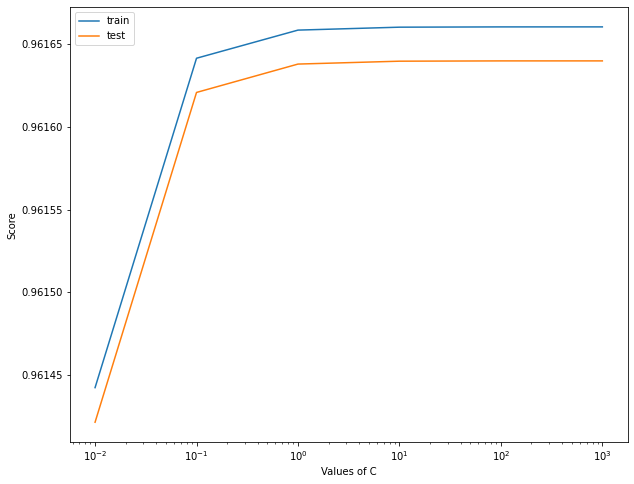

In [121]:
# Plotting the graph of C versus train and test scores

plt.figure(figsize = (10,8))
plt.plot(results['param_C'], results['mean_train_score'])
plt.plot(results['param_C'], results['mean_test_score'])
plt.xlabel('Values of C')
plt.ylabel('Score')
plt.legend(['train','test'])
plt.xscale('log')
plt.show()

In [122]:
# Using the optimal hyperparameter for logistic regression model.

logistic_adasyn = LogisticRegression(C=1000)
logistic_adasyn.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=1000)

Making predictions on the train set

In [123]:
# Making prediction on the train set
y_train_pred = logistic_adasyn.predict(X_train_adasyn)

# Prediction probability of the train set
y_train_pred_proba = logistic_adasyn.predict_proba(X_train_adasyn)[:,1]

In [124]:
# F1 score and classification report for train data 
scores(y_train_adasyn,y_train_pred)

F1 score -  0.89
Classification report - 

               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



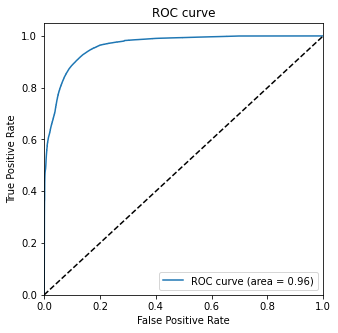

In [125]:
# Roc curve for the train set

roc(y_train_adasyn,y_train_pred_proba)

Making prediction on the test set

In [126]:
# Making prediction on the test set
y_test_pred = logistic_adasyn.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = logistic_adasyn.predict_proba(X_test)[:,1]

In [127]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.03
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



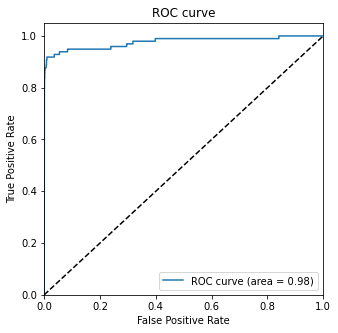

In [128]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : .96
             F1 score  :  .89
             
-Test set  :
            ROC score : .98
            F1 score  : .03

### 2. Decisoion Tree with ADASYN

In [129]:
# Choosing the parameters

parameters = {
    'min_samples_leaf' : range(50,150,50),
    'min_samples_split' : range(50,150,50),
    'max_depth' : range(5,15,5)
}


# Instanciating Decision Tree

tree = DecisionTreeClassifier()

#Instanciating Grid search CV

model_tree = GridSearchCV(estimator = tree,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1)

# Fitting the model on the data

model_tree.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [130]:
# Cross validation results

results = pd.DataFrame(model_tree.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,13.240727,0.174807,0.123339,0.015013,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.914978,0.909998,0.931665,0.918880,0.009266,8
1,13.664310,0.217298,0.140698,0.003444,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.914974,0.910840,0.931667,0.919160,0.009003,7
2,13.114743,0.508083,0.139376,0.010614,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.915076,0.911981,0.932550,0.919869,0.009055,6
3,12.690993,0.193326,0.120032,0.006115,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.916204,0.911877,0.932559,0.920213,0.008907,5
4,22.348281,0.331838,0.120859,0.010974,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.905977,0.941572,0.937611,0.928387,0.015928,4
5,22.232385,0.365936,0.110608,0.009549,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.909771,0.942236,0.937083,0.929696,0.014246,3
6,20.997842,1.345651,0.088452,0.009570,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.916117,0.947200,0.941622,0.934980,0.013531,2
7,18.731953,0.039336,0.058465,0.004636,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.919939,0.947347,0.942173,0.936486,0.011890,1


In [131]:
# Selecting the Optimal hyperparameter for the tree.

print(model_tree.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


Making the tree with optimal hyperparameters

In [132]:
adasyn_tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

adasyn_tree.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

Making preictions on the train set

In [133]:
# Making prediction on the train set
y_train_pred = adasyn_tree.predict(X_train_adasyn)

# Prediction probability of the train set
y_train_pred_proba = adasyn_tree.predict_proba(X_train_adasyn)[:,1]

In [134]:
# F1 score and classification report for train data 
scores(y_train_adasyn,y_train_pred)

F1 score -  0.98
Classification report - 

               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      0.99      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



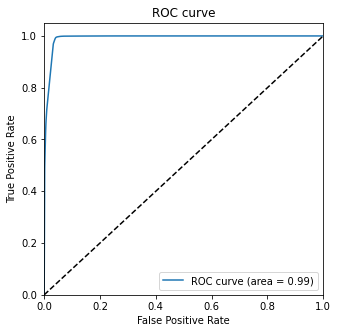

In [135]:
# Roc curve for the train set

roc(y_train_adasyn,y_train_pred_proba)

In [136]:
# Making prediction on the test set
y_test_pred = adasyn_tree.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = adasyn_tree.predict_proba(X_test)[:,1]

In [137]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.07
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



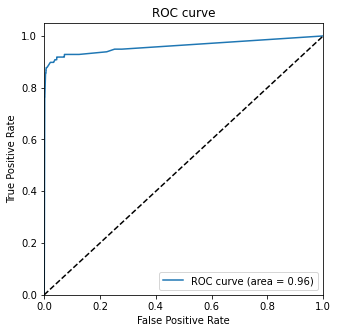

In [138]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : .99
             F1 score  :  .98
             
-Test set  :
            ROC score : .96
            F1 score  : .07

### 3. XGBoost with ADASYN

In [139]:
# Choosing the parameters

parameters = {
    'subsample': [0.3, 0.6, 0.9],
    'learning_rate': [0.2, 0.6],
    
    
             }


# Instanciating XGBoost model

xgboost = XGBClassifier(max_depth=2, n_estimators=200)

#Instanciating Grid search CV

xgboost_model = GridSearchCV(estimator = xgboost,
                         param_grid = parameters,
                         scoring= 'roc_auc',
                         cv = 3,
                         n_jobs = -1,
                         verbose = 1,
                         return_train_score = True)

# Fitting the model on the data

xgboost_model.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[21:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [140]:
# Cross validation results

results = pd.DataFrame(xgboost_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,227.314111,0.867011,0.530059,0.030027,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.984958,0.968837,0.996349,0.983381,0.011287,4,0.998973,0.999189,0.998847,0.999003,0.000141
1,259.674326,1.050308,0.546427,0.021261,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982246,0.965539,0.996213,0.981333,0.012539,6,0.998978,0.999082,0.998864,0.998975,0.000089
2,280.895698,0.664694,0.548080,0.035354,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982308,0.965918,0.996023,0.981416,0.012307,5,0.998945,0.999170,0.998787,0.998968,0.000157
3,229.704006,0.314371,0.643643,0.083017,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.993719,0.964377,0.998389,0.985495,0.015054,2,0.999933,0.999901,0.999906,0.999913,0.000014
4,255.207183,4.068130,0.417136,0.061168,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.989813,0.961606,0.999055,0.983491,0.015929,3,0.999906,0.999937,0.999913,0.999918,0.000013
5,176.690009,58.251440,0.233120,0.068128,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.992176,0.968188,0.999123,0.986496,0.013253,1,0.999943,0.999917,0.999909,0.999923,0.000015


In [141]:
# Selecting the Optimal hyperparameter for the XGBoost model.

print(xgboost_model.best_params_)

{'learning_rate': 0.6, 'subsample': 0.9}


Making the model with optimal hyperparameters

In [142]:
# Making the model with the optimal hyperparameters


adasyn_xgboost = XGBClassifier(learning_rate = 0.6,
                                max_depth = 2,
                                n_estimators = 200,
                                subsample =  0.9,
                                objective='binary:logistic')

# Fitting the model on hyperparameters

adasyn_xgboost.fit(X_train_adasyn,y_train_adasyn)


[21:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Making predictions on the train set

In [143]:
# Making prediction on the train set
y_train_pred = adasyn_xgboost.predict(X_train_adasyn)

# Prediction probability of the train set
y_train_pred_proba = adasyn_xgboost.predict_proba(X_train_adasyn)[:,1]

In [144]:
# F1 score and classification report for train data 
scores(y_train_adasyn,y_train_pred)

F1 score -  1.0
Classification report - 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



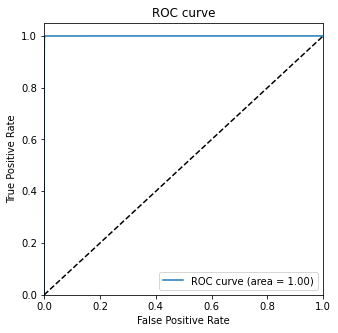

In [145]:
# Roc curve for the train set

roc(y_train_adasyn,y_train_pred_proba)

Making predictions on the test set

In [146]:
# Making prediction on the test set
y_test_pred = adasyn_xgboost.predict(X_test)

# Prediction probability on the test set
y_test_pred_proba = adasyn_xgboost.predict_proba(X_test)[:,1]

In [147]:
# F1 score and classification report for test data 
scores(y_test,y_test_pred)

F1 score -  0.36
Classification report - 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.23      0.88      0.36        98

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



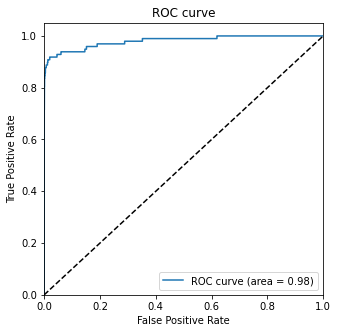

In [148]:
# Roc curve for the test set
roc(y_test,y_test_pred_proba)

####   Model results :

- Train set :
             ROC score : 1
             F1 score  :  1
             
-Test set  :
            ROC score : .98
            F1 score  : .36

### Select the oversampling method which shows the best result on a model



We have used different balancing technique to solve the class imbalance. We have used Random Oversampling, SMOTE, and Adasyn  to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each of these sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with Random over sampling technique. We got ROC score 100% on train data and 98% on the test data and F1 score 100% on train data and 86% on the test data. 

Hence, we conclude that the `XGBoost model with RandomOverSampler is the best model.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 12
3rd Top var = 4


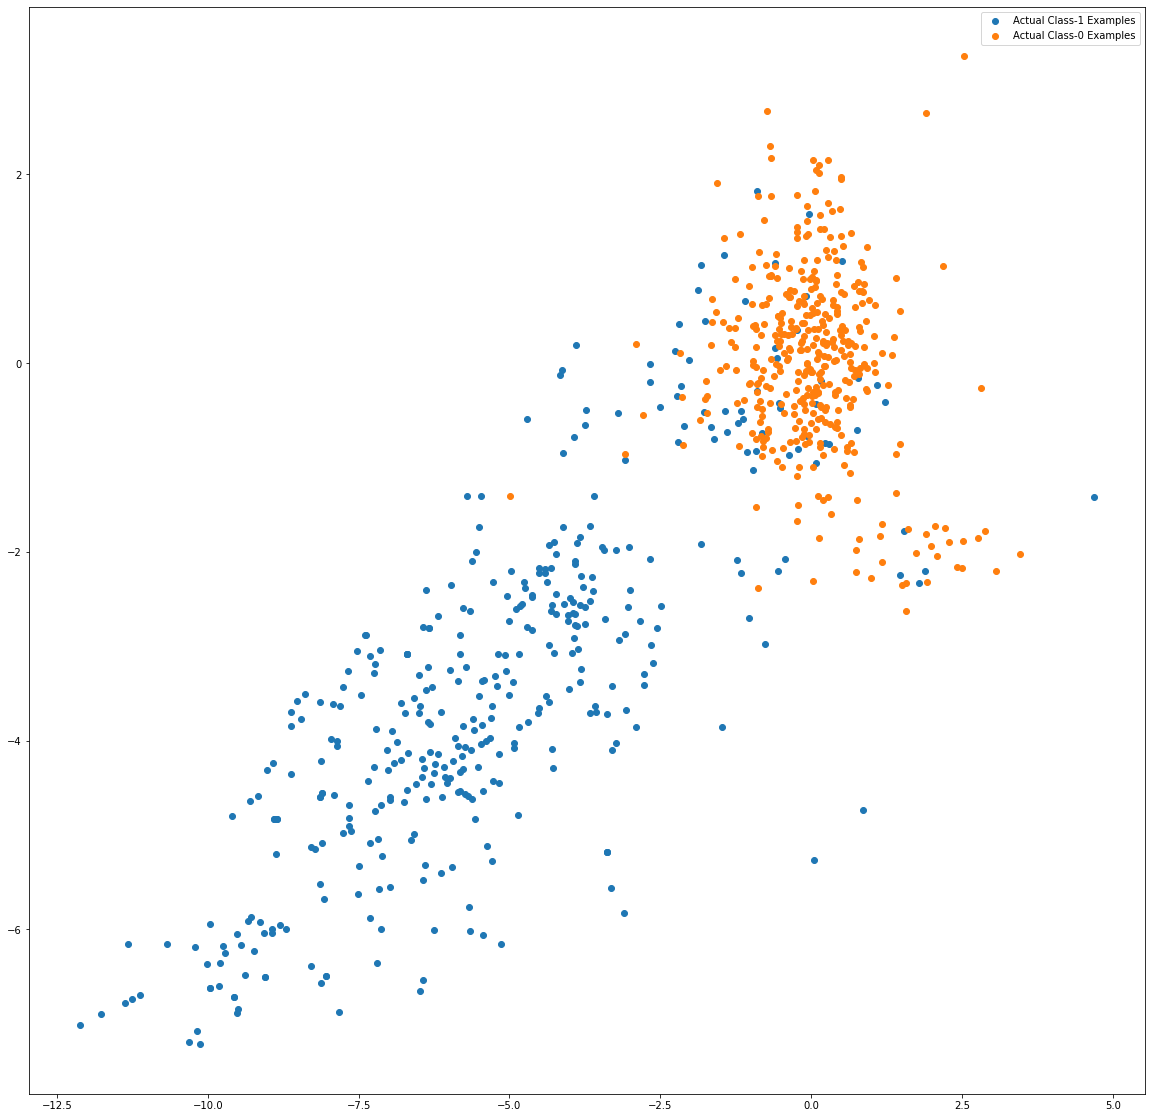

In [149]:
var_imp = []
for i in optimal_overxgboost.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(optimal_overxgboost.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(optimal_overxgboost.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(optimal_overxgboost.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(optimal_overxgboost.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(optimal_overxgboost.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [165]:
#### Print the FPR,TPR & select the best threshold from the roc curve optimal_overxgboost

print('Train auc_score =', metrics.roc_auc_score(y_oversample, y_train_pred_proba_over))
fpr, tpr, thresholds = metrics.roc_curve(y_oversample, y_train_pred_proba_over )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)



Train auc_score = 1.0
0.99975055


We have found that 99% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

### Summary 
Here, we tried to focus on a high recall value to detect actual fraudulent transactions in order to save the banks from fraud transactions,

After performing several models, we have seen that on the test balanced dataset with RandomOverSampler technique the XGBoost model has good ROC score(98%) and also high Recall(86%) . Hence, we will consider XGBoost model here.